In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import geopandas as gpd

## ETL

1. Extract

In [7]:
df = pd.read_csv('../data/rm-yields-data.csv')

In [5]:
df.head()

,Year,RM,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas
0,1938,1,NaN,NaN,4.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN
1,1939,1,NaN,NaN,9.0,NaN,NaN,NaN,16.0,NaN,NaN,16.0,NaN,NaN,NaN,NaN,0.0,NaN
2,1940,1,NaN,NaN,12.0,NaN,NaN,NaN,23.0,NaN,NaN,19.0,NaN,NaN,NaN,NaN,8.0,NaN
3,1941,1,NaN,NaN,18.0,NaN,NaN,NaN,32.0,NaN,NaN,28.0,NaN,NaN,NaN,NaN,5.0,NaN
4,1942,1,NaN,NaN,20.0,NaN,NaN,NaN,35.0,NaN,NaN,28.0,14.0,NaN,NaN,NaN,5.0,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25312 entries, 0 to 25311
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          25312 non-null  int64  
 1   RM            25312 non-null  int64  
 2   Winter Wheat  3073 non-null   float64
 3   Canola        14299 non-null  float64
 4   Spring Wheat  25213 non-null  float64
 5   Mustard       4584 non-null   float64
 6   Durum         11753 non-null  float64
 7   Sunflowers    946 non-null    float64
 8   Oats          24148 non-null  float64
 9   Lentils       5711 non-null   float64
 10  Peas          8421 non-null   float64
 11  Barley        24987 non-null  float64
 12  Fall Rye      15887 non-null  float64
 13  Canary Seed   3880 non-null   float64
 14  Spring Rye    805 non-null    float64
 15  Tame Hay      4205 non-null   float64
 16  Flax          21146 non-null  float64
 17  Chickpeas     1014 non-null   float64
dtypes: float64(16), int64(2)
m

Cleaning data

In [8]:
df['RM'] = df['RM'].astype('string')

In [10]:
df.head()

,Year,RM,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas
0,1938,1,NaN,NaN,4.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN
1,1939,1,NaN,NaN,9.0,NaN,NaN,NaN,16.0,NaN,NaN,16.0,NaN,NaN,NaN,NaN,0.0,NaN
2,1940,1,NaN,NaN,12.0,NaN,NaN,NaN,23.0,NaN,NaN,19.0,NaN,NaN,NaN,NaN,8.0,NaN
3,1941,1,NaN,NaN,18.0,NaN,NaN,NaN,32.0,NaN,NaN,28.0,NaN,NaN,NaN,NaN,5.0,NaN
4,1942,1,NaN,NaN,20.0,NaN,NaN,NaN,35.0,NaN,NaN,28.0,14.0,NaN,NaN,NaN,5.0,NaN


Year

In [12]:
df['Year'].unique()

array([1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

In [13]:
len(df['Year'].unique()) - (2022-1938 + 1)

0

In [14]:
df['Year'].unique()

array([1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

In [15]:
df['RM'].unique()

<StringArray>
[  '1',   '2',   '3',   '4',   '5',   '6',   '7',   '8',   '9',  '10',
 ...
 '499', '501', '502', '520', '521', '529', '555', '561', '588', '622']
Length: 299, dtype: string

In [16]:
df['RM'].nunique()

299

In [26]:
df

,Year,RM,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas
0,1938,1,NaN,NaN,4.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN
1,1939,1,NaN,NaN,9.0,NaN,NaN,NaN,16.0,NaN,NaN,16.0,NaN,NaN,NaN,NaN,0.0,NaN
2,1940,1,NaN,NaN,12.0,NaN,NaN,NaN,23.0,NaN,NaN,19.0,NaN,NaN,NaN,NaN,8.0,NaN
3,1941,1,NaN,NaN,18.0,NaN,NaN,NaN,32.0,NaN,NaN,28.0,NaN,NaN,NaN,NaN,5.0,NaN
4,1942,1,NaN,NaN,20.0,NaN,NaN,NaN,35.0,NaN,NaN,28.0,14.0,NaN,NaN,NaN,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25307,2018,622,NaN,39.3,59.5,NaN,NaN,NaN,96.4,NaN,43.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN
25308,2019,622,NaN,46.1,63.9,NaN,NaN,NaN,106.0,NaN,33.7,73.9,NaN,NaN,NaN,NaN,NaN,NaN
25309,2020,622,NaN,40.9,55.1,NaN,NaN,NaN,94.5,NaN,49.2,74.3,NaN,NaN,NaN,NaN,NaN,NaN
25310,2021,622,NaN,23.9,17.0,NaN,NaN,NaN,25.8,NaN,NaN,23.3,NaN,NaN,NaN,NaN,NaN,NaN


Missing Values

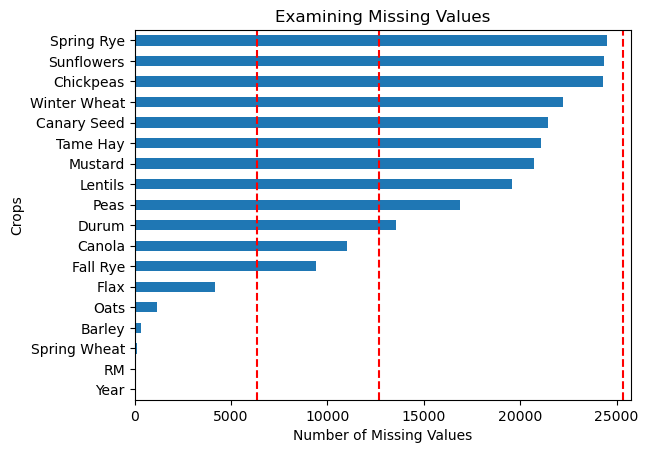

In [22]:
df.isna().sum().sort_values().plot(kind='barh')
plt.title('Examining Missing Values')
plt.xlabel('Number of Missing Values')
plt.ylabel('Crops')
plt.axvline(len(df), linestyle='--', color='red')
plt.axvline(len(df)/2, linestyle='--', color='red')
plt.axvline(len(df)/4, linestyle='--', color='red')
plt.show()

Descriptive Statistics

In [36]:
df['RM']

0          1
1          1
2          1
3          1
4          1
        ... 
25307    622
25308    622
25309    622
25310    622
25311    622
Name: RM, Length: 25312, dtype: string

In [39]:
df.describe()

,Year,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas
count,25312.000000,3073.000000,14299.000000,25213.000000,4584.000000,11753.000000,946.000000,24148.000000,5711.000000,8421.000000,24987.000000,15887.000000,3880.000000,805.000000,4205.000000,21146.000000,1014.000000
mean,1979.882585,38.300752,24.375748,26.008196,840.439197,29.194504,692.629915,47.480732,1174.339424,31.150006,38.286998,21.280575,1000.768894,7.575776,1.181520,14.386018,1406.707761
std,24.510677,12.270270,9.418762,11.415548,277.945047,10.050334,555.776604,22.311986,410.233784,10.360523,16.864151,10.202960,359.835810,12.473814,0.654725,7.170933,582.888314
min,1938.000000,3.000000,0.000000,0.000000,35.600000,0.000000,0.000000,0.000000,46.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,31.000000
25%,1959.000000,30.000000,18.000000,19.000000,655.007500,23.000000,0.000000,33.000000,900.000000,24.300000,26.200000,15.000000,758.750000,0.000000,0.750000,9.000000,1000.000000
50%,1980.000000,38.000000,23.000000,25.800000,842.000000,28.300000,790.500000,46.000000,1168.000000,31.200000,38.000000,20.000000,1000.000000,0.000000,1.200000,14.000000,1363.600000
75%,2001.000000,45.700000,29.700000,32.000000,1000.000000,34.500000,1100.000000,59.400000,1441.000000,38.100000,49.000000,26.300000,1206.775000,20.000000,1.570000,19.400000,1781.000000
max,2022.000000,90.000000,59.500000,198.000000,2500.000000,88.100000,2400.000000,165.100000,3411.000000,86.800000,105.940000,108.000000,2727.000000,46.500000,4.000000,110.000000,5400.000000


<Axes: >

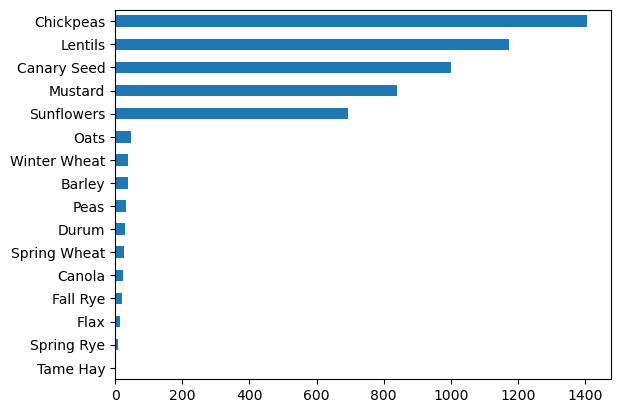

In [41]:
df.drop(['Year', 'RM'], axis=1).describe().T['mean'].sort_values().plot(kind='barh')

In [42]:
df.columns

Index(['Year', 'RM', 'Winter Wheat', 'Canola', 'Spring Wheat', 'Mustard',
       'Durum', 'Sunflowers', 'Oats', 'Lentils', 'Peas', 'Barley', 'Fall Rye',
       'Canary Seed', 'Spring Rye', 'Tame Hay', 'Flax', 'Chickpeas'],
      dtype='object')

In [ ]:
bushels = ['Winter Wheat', 'Canola', 'Spring Wheat', 'Mustard',
        'Durum', 'Sunflowers', 'Oats', 'Lentils', 'Peas', 'Barley', 'Fall Rye',
        'Canary Seed', 'Spring Rye', 'Tame Hay', 'Flax', 'Chickpeas']